In [2]:
import cv2 

# img = cv2.imread('/home/likcos/DataSets/sportimages/sportimages/basket/basket2_0001.jpg')
# print(img.shape[0], img.shape[1], img.shape[2], len(img.shape))

# Convolutional Neural Networks

# Importar Librerías

In [3]:
import numpy as np
import os
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [4]:
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential,Model
from tensorflow.keras.layers import Input
from keras.layers import Dense, Dropout, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, Conv2D
)
from keras.layers import LeakyReLU

# Cargar set de Imágenes

In [5]:
dirname = os.path.join(os.getcwd(),'./datasets')
imgpath = dirname + os.sep 

images = []
directories = []
dircount = []
prevRoot=''
cant=0

print("leyendo imagenes de ",imgpath)

for root, dirnames, filenames in os.walk(imgpath):
    for filename in filenames:
        if re.search("\.(jpg|jpeg|png|bmp|tiff)$", filename):
            cant=cant+1
            filepath = os.path.join(root, filename)
            image = plt.imread(filepath)
            if(len(image.shape)==3):
                
                images.append(image)
            b = "Leyendo..." + str(cant)
            print (b, end="\r")
            if prevRoot !=root:
                print(root, cant)
                prevRoot=root
                directories.append(root)
                dircount.append(cant)
                cant=0
dircount.append(cant)

dircount = dircount[1:]
dircount[0]=dircount[0]+1
print('Directorios leidos:',len(directories))
print("Imagenes en cada directorio", dircount)
print('suma Total de imagenes en subdirs:',sum(dircount))

leyendo imagenes de  d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\dientes_leon 1
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\girasoles 5000
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\margaritas 5000
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\rosas 5000
d:\DocumentosHDD\9no_Semestre\Inteligencia Artificial\IA\./datasets\tulipanes 5000
Directorios leidos: 5
Imagenes en cada directorio [5001, 5000, 5000, 5000, 4999]
suma Total de imagenes en subdirs: 25000


# Creamos las etiquetas

In [6]:
labels=[]
indice=0
for cantidad in dircount:
    for i in range(cantidad):
        labels.append(indice)
    indice=indice+1
print("Cantidad etiquetas creadas: ",len(labels))


Cantidad etiquetas creadas:  25000


In [7]:
flores=[]
indice=0
for directorio in directories:
    name = directorio.split(os.sep)
    print(indice , name[len(name)-1])
    flores.append(name[len(name)-1])
    indice=indice+1

0 dientes_leon
1 girasoles
2 margaritas
3 rosas
4 tulipanes


In [8]:
y = np.array(labels)
X = np.array(images, dtype=np.uint8) #convierto de lista a numpy



# Find the unique numbers from the train labels
classes = np.unique(y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  5
Output classes :  [0 1 2 3 4]


# Creamos Sets de Entrenamiento y Test

In [9]:
train_X,test_X,train_Y,test_Y = train_test_split(X,y,test_size=0.2)
print('Training data shape : ', train_X.shape, train_Y.shape)
print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (20000, 32, 32, 3) (20000,)
Testing data shape :  (5000, 32, 32, 3) (5000,)


Text(0.5, 1.0, 'Ground Truth : 3')

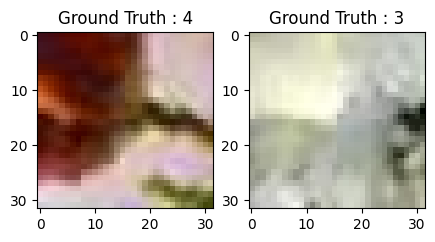

In [10]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

# Preprocesamos las imagenes

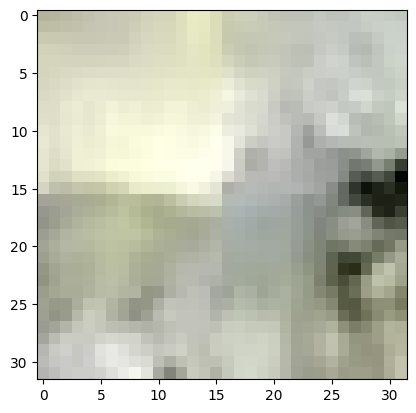

In [11]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X/255.
test_X = test_X/255.
plt.imshow(test_X[0,:,:])

## Hacemos el One-hot Encoding para la red

In [12]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Original label: 4
After conversion to one-hot: [0. 0. 0. 0. 1.]


# Creamos el Set de Entrenamiento y Validación

In [13]:
#Mezclar todo y crear los grupos de entrenamiento y testing
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [14]:
print(train_X.shape,valid_X.shape,train_label.shape,valid_label.shape)

(16000, 32, 32, 3) (4000, 32, 32, 3) (16000, 5) (4000, 5)


# Creamos el modelo de CNN

In [15]:
#declaramos variables con los parámetros de configuración de la red
INIT_LR = 1e-3 # Valor inicial de learning rate. El valor 1e-3 corresponde con 0.001
epochs = 20 # Cantidad de iteraciones completas al conjunto de imagenes de entrenamiento
batch_size = 64 # cantidad de imágenes que se toman a la vez en memoria

In [17]:
flower_model = Sequential()
flower_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(21,28,3)))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(MaxPooling2D((2, 2),padding='same'))
flower_model.add(Dropout(0.5))

flower_model.add(Flatten())
flower_model.add(Dense(32, activation='linear'))
flower_model.add(LeakyReLU(alpha=0.1))
flower_model.add(Dropout(0.5))
flower_model.add(Dense(nClasses, activation='softmax'))

In [18]:
flower_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 21, 28, 32)        896       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 21, 28, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 11, 14, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 4928)              0         
                                                                 
 dense_2 (Dense)             (None, 32)                157728    
                                                      

In [19]:
flower_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=INIT_LR, decay=INIT_LR / 100),metrics=['accuracy'])

# Entrenamos el modelo: Aprende a clasificar imágenes

In [21]:
# este paso puede tomar varios minutos, dependiendo de tu ordenador, cpu y memoria ram libre
flower_train = flower_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20


2023-05-16 10:24:06.762744: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 348291216 exceeds 10% of free system memory.


768/772 [============================>.] - ETA: 0s - loss: 2.2725 - accuracy: 0.1514

2023-05-16 10:24:14.944344: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 87078096 exceeds 10% of free system memory.


772/772 [==============================] - 9s 11ms/step - loss: 2.2722 - accuracy: 0.1517 - val_loss: 2.1937 - val_accuracy: 0.2947
Epoch 2/20
772/772 [==============================] - 8s 10ms/step - loss: 2.1552 - accuracy: 0.2351 - val_loss: 1.9933 - val_accuracy: 0.4761
Epoch 3/20
772/772 [==============================] - 9s 12ms/step - loss: 2.0091 - accuracy: 0.3061 - val_loss: 1.8045 - val_accuracy: 0.5511
Epoch 4/20
772/772 [==============================] - 10s 12ms/step - loss: 1.8716 - accuracy: 0.3615 - val_loss: 1.6380 - val_accuracy: 0.6045
Epoch 5/20
772/772 [==============================] - 10s 12ms/step - loss: 1.7469 - accuracy: 0.4040 - val_loss: 1.4946 - val_accuracy: 0.6293
Epoch 6/20
772/772 [==============================] - 10s 12ms/step - loss: 1.6356 - accuracy: 0.4457 - val_loss: 1.3716 - val_accuracy: 0.6711
Epoch 7/20
772/772 [==============================] - 12s 15ms/step - loss: 1.5423 - accuracy: 0.4772 - val_loss: 1.2669 - val_accuracy: 0.6918
Epoch 

In [32]:
# guardamos la red, para reutilizarla en el futuro, sin tener que volver a entrenar
flower_model.save("./flores.h5py")

2023-05-16 10:40:39.715079: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,11,14,32]
	 [[{{node inputs}}]]
2023-05-16 10:40:39.734708: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,32]
	 [[{{node inputs}}]]
2023-05-16 10:40:39.881578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,11,14,32]
	 [[{{node inputs}}]]
2023-05

INFO:tensorflow:Assets written to: /home/likcos/setDocto/celulas.h5py/assets


INFO:tensorflow:Assets written to: /home/likcos/setDocto/celulas.h5py/assets


# Evaluamos la red

In [33]:
test_eval = flower_model.evaluate(test_X, test_Y_one_hot, verbose=1)

 76/483 [===>..........................] - ETA: 0s - loss: 0.7402 - accuracy: 0.8030

2023-05-16 10:40:41.901119: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 108845856 exceeds 10% of free system memory.


483/483 [==============================] - 1s 2ms/step - loss: 0.7350 - accuracy: 0.8046


In [34]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.735000729560852
Test accuracy: 0.8046155571937561


In [35]:
flower_model.history

{'loss': [2.2721898555755615,
  2.1551661491394043,
  2.0091211795806885,
  1.8716282844543457,
  1.7468831539154053,
  1.6356275081634521,
  1.54227876663208,
  1.458584189414978,
  1.3833545446395874,
  1.3242242336273193,
  1.2658567428588867,
  1.2229918241500854,
  1.1761415004730225,
  1.1426658630371094,
  1.1075693368911743,
  1.0804094076156616,
  1.050597071647644,
  1.0250179767608643,
  1.0063029527664185,
  0.9876944422721863],
 'accuracy': [0.15169870853424072,
  0.23514515161514282,
  0.30607160925865173,
  0.3614594638347626,
  0.40400317311286926,
  0.4457162618637085,
  0.47723910212516785,
  0.505216658115387,
  0.5302566885948181,
  0.5477603673934937,
  0.5688093900680542,
  0.5835173726081848,
  0.5999878644943237,
  0.612467348575592,
  0.6235691905021667,
  0.6358258724212646,
  0.6464617848396301,
  0.6551123261451721,
  0.664715051651001,
  0.6664168238639832],
 'val_loss': [2.193744421005249,
  1.9932764768600464,
  1.804470419883728,
  1.637969970703125,
  1

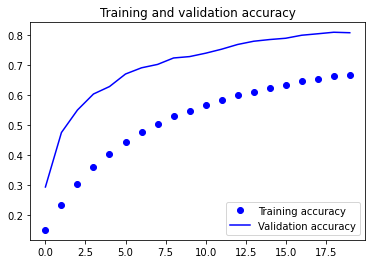

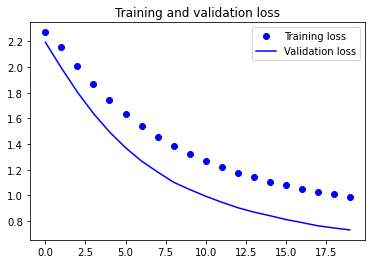

In [36]:
accuracy = flower_train.history['accuracy']
val_accuracy = flower_train.history['val_accuracy']
loss = flower_train.history['loss']
val_loss = flower_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [37]:
predicted_classes2 = flower_model.predict(test_X)

483/483 [==============================] - 1s 2ms/step


In [38]:
predicted_classes=[]
for predicted_flower in predicted_classes2:
    predicted_classes.append(predicted_flower.tolist().index(max(predicted_flower)))
predicted_classes=np.array(predicted_classes)

In [39]:
predicted_classes.shape, test_Y.shape

((15426,), (15426,))

# Aprendamos de los errores: Qué mejorar

Found 12412 correct labels


NameError: name 'deportes' is not defined

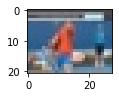

In [40]:
correct = np.where(predicted_classes==test_Y)[0]
print("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[correct]],
                                                    flores[test_Y[correct]]))

    plt.tight_layout()

Found 3161 incorrect labels


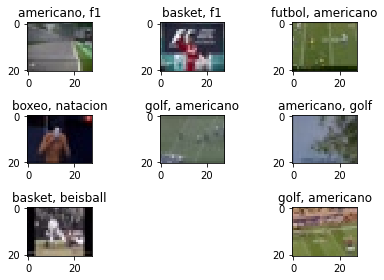

In [33]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[0:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(21,28,3), cmap='gray', interpolation='none')
    plt.title("{}, {}".format(flores[predicted_classes[incorrect]],
                                                    flores[test_Y[incorrect]]))
    plt.tight_layout()

In [ ]:
target_names = ["Class {}".format(i) for i in range(nClasses)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))